<a href="https://colab.research.google.com/github/vifirsanova/empi/blob/main/demos/teaching_assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Виртуальный ассистент для преподавателя**

*Вашему вниманию предлагается демонстрационная версия (демо-версия) программного обеспечения "Виртуальный ассистент для преподавателя". Предлагаемая система выполняет 4 задачи: помогает преподавателю создавать задания для студентов, дидактический и графический иллюстративный материал и производить проверку студенческих работ на заимствования (плагиат и искусственный интеллект).*

Представленное ПО использует алгоритмы **генеративного моделирования языка**. В основе алгоритма - математическая модель вероятностного рапределения токенов (элементов текста) в большой выборке текстов.

**Отказ от ответственности**

Автор демо-версии ПО не несет ответственности за точность, полноту или качество предоставленной в выдачах ПО информации. Никакие претензии за материальный или нематериальный ущерб, вызванный использованием или неиспользованием предоставленной информации не принимаются.

**Обратная связь**

Автор демо-версии: [Виктория Фирсанова](https://vifirsanova.github.io/).
Свою обратную связь вы можете отправить в Telegram @vifirsanova или на почту vifirsanova@gmail.com. Принимаются любые пожелания и предложения по разработке продукта.

In [ ]:
from IPython.display import clear_output

print("Внимание, идёт загрузка... \n Время ожидания: 5 минут")

import torch

import gc

torch.set_default_device("cuda")

import locale
locale.getpreferredencoding = lambda: "UTF-8"

#@title **Виртуальный асситент для преподавателя (демо-версия)**

#@markdown  В поле **TASK** выберите одну задачу из списка.

TASK = "Задачи для студентов" # @param ["\u0414\u0438\u0434\u0430\u043A\u0442\u0438\u0447\u0435\u0441\u043A\u0438\u0439 \u043C\u0430\u0442\u0435\u0440\u0438\u0430\u043B", "\u0417\u0430\u0434\u0430\u0447\u0438 \u0434\u043B\u044F \u0441\u0442\u0443\u0434\u0435\u043D\u0442\u043E\u0432", "\u0413\u0440\u0430\u0444\u0438\u0447\u0435\u0441\u043A\u0430\u044F \u0438\u043B\u043B\u044E\u0441\u0442\u0440\u0430\u0446\u0438\u044F \u0434\u043B\u044F \u0441\u0442\u0443\u0434\u0435\u043D\u0442\u043E\u0432", "\u0417\u0430\u043F\u0443\u0441\u0442\u0438\u0442\u044C \u043F\u0440\u043E\u0432\u0435\u0440\u043A\u0443 \u043D\u0430 \u043F\u043B\u0430\u0433\u0438\u0430\u0442 \u0438 \u0437\u0430\u0438\u043C\u0441\u0442\u0432\u043E\u0432\u0430\u043D\u0438\u044F \u0418\u0418 (\u0432 \u0440\u0430\u0437\u0440\u0430\u0431\u043E\u0442\u043A\u0435)"]

#@markdown  В поле **TEXT** опишите тему вашего урока, семинара или практического занятия, либо введите текст для проверки на заимствования.

TEXT = "анализ данных" #@param {type:"string"}

def generate_text(input_text):
    !pip install transformers

    from transformers import AutoModelForCausalLM, AutoTokenizer

    model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2", torch_dtype="auto", trust_remote_code=True)
    tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2", trust_remote_code=True)

    gc.collect()

    inputs = tokenizer(input_text, return_tensors="pt", return_attention_mask=False)

    outputs = model.generate(**inputs, max_length=500)
    text = tokenizer.batch_decode(outputs)[0]
    return text

def generate_image(input_text):
    !pip install diffusers

    from diffusers import AutoPipelineForText2Image

    pipeline = AutoPipelineForText2Image.from_pretrained("CompVis/stable-diffusion-v1-4").to("cuda")
    image = pipeline(input_text).images[0]
    return image

if TASK == "Задачи для студентов":
    input_text = TASK + ' на тему ' + TEXT + '.'
    result = generate_text(input_text)

elif TASK == "Дидактический материал":
    input_text = TEXT + ': определение и свойства.'
    result = generate_text(input_text)

elif TASK == "Графическая иллюстрация для студентов":
    input_text = TEXT
    result = generate_image(input_text)

else:
    result = "Функция в разработке. Для проверки текста на заимствования из ChatGPT посетите https://www.zerogpt.com/"

clear_output()
result

Задачи для студентов на тему анализ данных.
Напишите программу, которая принимает на вход список двух чисел, и выводит на экран список всех чисел, которые больше первого или второго элемента.
Пример: входные списки: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
выходные списки: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
"""

def solution(list1, list2):
    list1.sort()
    list2.sort()
    list3 = []
    for i in range(len(list1)):
        if list1[i] > list2[i]:
            list3.append(list1[i])
        else:
            list3.append(list2[i])
    return list3

print(solution([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
print(solution([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]))
print(solution([1, 2, 3, 4


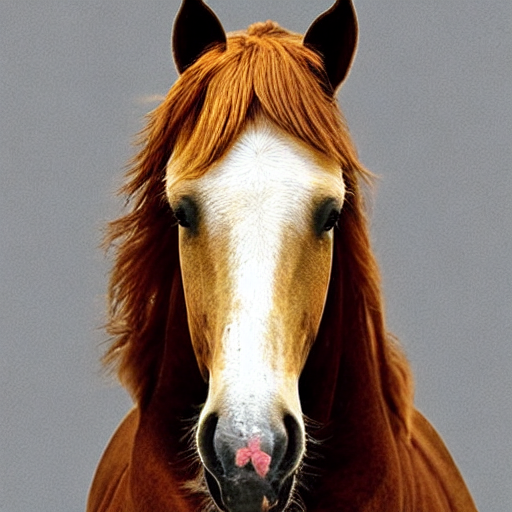

In [5]:
from IPython.display import clear_output

print("Внимание, идёт загрузка... \n Время ожидания: 5 минут")

import torch

import gc

torch.set_default_device("cuda")

import locale
locale.getpreferredencoding = lambda: "UTF-8"

#@title **Виртуальный асситент для преподавателя (демо-версия)**

#@markdown  В поле **TASK** выберите одну задачу из списка.

TASK = "Графическая иллюстрация для студентов" # @param ["\u0414\u0438\u0434\u0430\u043A\u0442\u0438\u0447\u0435\u0441\u043A\u0438\u0439 \u043C\u0430\u0442\u0435\u0440\u0438\u0430\u043B", "\u0417\u0430\u0434\u0430\u0447\u0438 \u0434\u043B\u044F \u0441\u0442\u0443\u0434\u0435\u043D\u0442\u043E\u0432", "\u0413\u0440\u0430\u0444\u0438\u0447\u0435\u0441\u043A\u0430\u044F \u0438\u043B\u043B\u044E\u0441\u0442\u0440\u0430\u0446\u0438\u044F \u0434\u043B\u044F \u0441\u0442\u0443\u0434\u0435\u043D\u0442\u043E\u0432", "\u0417\u0430\u043F\u0443\u0441\u0442\u0438\u0442\u044C \u043F\u0440\u043E\u0432\u0435\u0440\u043A\u0443 \u043D\u0430 \u043F\u043B\u0430\u0433\u0438\u0430\u0442 \u0438 \u0437\u0430\u0438\u043C\u0441\u0442\u0432\u043E\u0432\u0430\u043D\u0438\u044F \u0418\u0418 (\u0432 \u0440\u0430\u0437\u0440\u0430\u0431\u043E\u0442\u043A\u0435)"]

#@markdown  В поле **TEXT** опишите тему вашего урока, семинара или практического занятия, либо введите текст для проверки на заимствования.

TEXT = "horse" #@param {type:"string"}

def generate_text(input_text):
    !pip install transformers

    from transformers import AutoModelForCausalLM, AutoTokenizer

    model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2", torch_dtype="auto", trust_remote_code=True)
    tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2", trust_remote_code=True)

    gc.collect()

    inputs = tokenizer(input_text, return_tensors="pt", return_attention_mask=False)

    outputs = model.generate(**inputs, max_length=500)
    text = tokenizer.batch_decode(outputs)[0]
    return text

def generate_image(input_text):
    !pip install diffusers

    from diffusers import AutoPipelineForText2Image

    pipeline = AutoPipelineForText2Image.from_pretrained("CompVis/stable-diffusion-v1-4").to("cuda")
    image = pipeline(input_text).images[0]
    return image

if TASK == "Задачи для студентов":
    input_text = TASK + ' на тему ' + TEXT + '.'
    result = generate_text(input_text)

elif TASK == "Дидактический материал":
    input_text = TEXT + ': определение и свойства.'
    result = generate_text(input_text)

elif TASK == "Графическая иллюстрация для студентов":
    input_text = TEXT
    result = generate_image(input_text)

else:
    result = "Функция в разработке. Для проверки текста на заимствования из ChatGPT посетите https://www.zerogpt.com/"

clear_output()
result